In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('/Users/dhruvpatel/Desktop/projects/DealPredection/data/vehicles.csv')

print(df.head())

# EDA

In [ ]:
df.columns

In [3]:
## drop the columns that are not needed 
df_cleaned=df
df_cleaned=df_cleaned.drop(['url','image_url','county','VIN','size','condition','posting_date','cylinders'],axis=1) 

In [ ]:
df_cleaned.isnull().sum()

In [5]:
# dropping rows due to NAs 

df_cleaned =df_cleaned.dropna(subset=['year','description','fuel','odometer','lat','long','transmission','model'])

In [ ]:
df_cleaned.isnull().sum()

In [ ]:
len(df)-len(df_cleaned)

# Filling missing values 

In [ ]:
# filling missing values in title status with 'missing' 

df_cleaned['title_status'] = df_cleaned['title_status'].fillna('missing')
df_cleaned.isnull().sum()

In [9]:
df_cleaned['transmission'] = df_cleaned['transmission'].fillna('other')

In [ ]:
# filling null values from the model. 
from model_extract import process_car_dataset

featured_eng=process_car_dataset(df_cleaned)


In [11]:
# increase = featured_eng['drive'].value_counts() - df_cleaned['drive'].value_counts()
# print(increase)

In [ ]:
# null values reduced 
featured_eng.isnull().sum() - df_cleaned.isnull().sum()

In [ ]:
df_cleaned['cylinders'].unique()

In [ ]:
featured_eng.isnull().sum()

In [ ]:
# handling the maufacturer column  

# prinitng the values where manufecturer is null 

manufecturer_null = featured_eng[featured_eng['manufacturer'].isna()]

# printing the values where manufecturer is null 


manufecturer_null['model'].value_counts()





In [16]:
# dropping the rows where manufacturer is null 

featured_eng = featured_eng[featured_eng['manufacturer'].notna()]



# drive column cleaning 

In [ ]:
featured_eng['drive'].value_counts()

In [ ]:
from drive_cleaning import process_drive_column
featured_eng=process_drive_column(featured_eng, 'drive')


In [ ]:
# filling null values from research :
from drive_cleaning import fill_missing_drive_from_reference


featured_eng = fill_missing_drive_from_reference(featured_eng,reference_file='/Users/dhruvpatel/Desktop/projects/DealPredection/data/models_with_drive.csv')






 

In [ ]:
featured_eng['drive'].isna().sum()

In [ ]:
featured_eng['drive'].value_counts()

In [ ]:
featured_eng.isnull().sum()

# Cleaning Model 

Clean in stages:
* Stage 1: Remove obvious junk (numbers, too short, too long)
* Stage 2: Extract core model from complex strings
* Stage 3: Standardize spelling and format
* Stage 4: Apply manufacturer-specific rules

In [ ]:
# Stage 1 : Remove obvious junk (numbers, too short, too long)

from model_cleaning import remove_numerical_models

featured_eng=remove_numerical_models(featured_eng)

featured_eng['model'].value_counts().to_csv('model_counts.csv')






In [24]:
# stage 2 : 

In [ ]:
featured_eng['manufacturer'].unique()

In [26]:
# featured_eng.to_csv('cleaned_data.csv')


In [27]:
# import pandas as pd 
# featured_eng = pd.read_csv('cleaned_data.csv')

In [ ]:
featured_eng['model'].value_counts()


In [ ]:
df_cleaned['cylinders'].unique()

In [ ]:
from model_cleaning import clean_models_with_list
 
featured_eng_new = clean_models_with_list(featured_eng) 

In [ ]:
df_cleaned['cylinders'].unique()

In [ ]:
featured_eng_new['model'].value_counts()

In [33]:
featured_eng_new.to_csv('clean_v1.csv')

# Stage 2 :

In [ ]:
import pandas as pd 
clean_df =pd.read_csv('clean_v1.csv')
clean_df.head()

In [ ]:
clean_df.isnull().sum()

# Drive missing value impute 

In [ ]:
clean_df['drive'].value_counts()
 

In [ ]:
clean_df['drive'].isna().sum() 
 

In [ ]:
clean_df['type'].value_counts()

In [39]:
# cleaning and standardasition 
clean_df['type'] = clean_df['type'].replace({'mini van': 'minivan', 'mini-van': 'minivan'})




In [ ]:
# Method 1: Using crosstab with percentages
drive_type_breakdown = pd.crosstab(clean_df['type'], clean_df['drive'], normalize='index') * 100
print("Drive Type Distribution by Car Type (Percentages):")
print(drive_type_breakdown.round(2))

print("\n" + "="*60 + "\n")


# based on the data , lets fill the null values with condition.  
# Assumptions : 
# 1 ) if the vehicle type are SUV ,  offroad , pickup , truck, other or wagon then fill ->  drive as 4wd 
# 2) if vehicle type are hatchback, minivan, sedan, van then fill -> drive fwd  
# 3 if  vehicle  are bus,convertible,coupe then fill rwd  
# for other 


In [ ]:
# impute - > Define the conditions and corresponding drive types
# Condition 1: SUV, offroad, pickup, truck, other, wagon -> 4WD
condition_4wd = clean_df['type'].isin(['SUV', 'offroad', 'pickup', 'truck', 'other', 'wagon'])

# Condition 2: hatchback, minivan, sedan, van -> FWD
condition_fwd = clean_df['type'].isin(['hatchback', 'minivan', 'sedan', 'van'])

# Condition 3: bus, convertible, coupe -> RWD
condition_rwd = clean_df['type'].isin(['bus', 'convertible', 'coupe'])

# Apply the imputation only to missing values
# Method 1: Using loc with conditions
clean_df.loc[(clean_df['drive'].isnull()) & condition_4wd, 'drive'] = '4wd'
clean_df.loc[(clean_df['drive'].isnull()) & condition_fwd, 'drive'] = '4wd'
clean_df.loc[(clean_df['drive'].isnull()) & condition_rwd, 'drive'] = 'rwd'

clean_df['drive'].value_counts()






In [ ]:
clean_df[clean_df['drive'].isna()]

In [43]:
clean_df.to_csv('clean_v1.csv')

In [ ]:
import pandas as pd 
clean_df =pd.read_csv('clean_v1.csv')
clean_df.head()

In [ ]:
clean_df.isnull().sum()

In [46]:
# droppign columns where drive ad type both is null 
clean_df = clean_df.dropna(subset=['drive', 'type'], how='all')

In [ ]:
clean_df.isnull().sum()

In [ ]:
clean_df['type'].value_counts()

In [ ]:
clean_df[clean_df['type'].isna()]['model'].value_counts()

In [ ]:
# filling null values based on data present. 
# First, let's see what we're working with
print("Models with missing types:")
print(clean_df[clean_df['type'].isna()]['model'].value_counts())

# Create a mapping of model to most common type
model_type_mapping = clean_df.groupby('model')['type'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Fill missing values using this mapping
clean_df['type'] = clean_df['type'].fillna(clean_df['model'].map(model_type_mapping))

# Check if there are still any missing values
print(f"\nRemaining missing values in 'type': {clean_df['type'].isna().sum()}")


In [ ]:
clean_df.isnull().sum()

In [ ]:
clean_df['paint_color'].value_counts()

In [53]:
clean_df['model'].value_counts().to_csv('model_counts.csv') 

In [54]:
# clean_df.to_csv('clean_v1.csv')

# Stage 3 

In [1]:
import pandas as pd 

df =pd.read_csv('clean_v1.csv') 
df.head(10)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,region,region_url,price,year,manufacturer,model,...,title_status,transmission,drive,type,paint_color,description,state,lat,long,posting_date
0,0,0,27,7316814884,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,Sierra,...,clean,other,4wd,pickup,white,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-04T12:31:18-0500
1,1,1,28,7316814758,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado,...,clean,other,4wd,pickup,blue,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-04T12:31:08-0500
2,2,2,29,7316814989,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado,...,clean,other,4wd,pickup,red,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-04T12:31:25-0500
3,3,3,30,7316743432,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,Tundra,...,clean,other,4wd,pickup,red,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-04T10:41:31-0500
4,4,4,31,7316356412,auburn,https://auburn.craigslist.org,15000,2013.0,ford,F-150,...,clean,automatic,rwd,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.5920,-85.518900,2021-05-03T14:02:03-0500
5,5,5,32,7316343444,auburn,https://auburn.craigslist.org,27990,2012.0,gmc,Sierra,...,clean,other,4wd,pickup,black,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-03T13:41:25-0500
6,6,6,33,7316304717,auburn,https://auburn.craigslist.org,34590,2016.0,chevrolet,silverado,...,clean,other,4wd,pickup,silver,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-03T12:41:33-0500
7,7,7,34,7316285779,auburn,https://auburn.craigslist.org,35000,2019.0,toyota,tacoma,...,clean,automatic,4wd,truck,grey,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,al,32.6013,-85.443974,2021-05-03T12:12:59-0500
8,8,8,35,7316257769,auburn,https://auburn.craigslist.org,29990,2016.0,chevrolet,colorado,...,clean,other,4wd,pickup,red,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-03T11:31:14-0500
9,9,9,36,7316133914,auburn,https://auburn.craigslist.org,38590,2011.0,chevrolet,corvette,...,clean,other,rwd,other,red,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-03T07:50:35-0500


In [2]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'region',
       'region_url', 'price', 'year', 'manufacturer', 'model', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

In [3]:
df =df.drop(['Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0'],axis=1)
df.head(10) 

,id,region,region_url,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long,posting_date
0,7316814884,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,Sierra,8 cylinders,gas,57923.0,clean,other,4wd,pickup,white,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-04T12:31:18-0500
1,7316814758,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado,8 cylinders,gas,71229.0,clean,other,4wd,pickup,blue,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-04T12:31:08-0500
2,7316814989,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado,8 cylinders,gas,19160.0,clean,other,4wd,pickup,red,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-04T12:31:25-0500
3,7316743432,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,Tundra,8 cylinders,gas,41124.0,clean,other,4wd,pickup,red,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-04T10:41:31-0500
4,7316356412,auburn,https://auburn.craigslist.org,15000,2013.0,ford,F-150,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.5920,-85.518900,2021-05-03T14:02:03-0500
5,7316343444,auburn,https://auburn.craigslist.org,27990,2012.0,gmc,Sierra,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-03T13:41:25-0500
6,7316304717,auburn,https://auburn.craigslist.org,34590,2016.0,chevrolet,silverado,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-03T12:41:33-0500
7,7316285779,auburn,https://auburn.craigslist.org,35000,2019.0,toyota,tacoma,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,al,32.6013,-85.443974,2021-05-03T12:12:59-0500
8,7316257769,auburn,https://auburn.craigslist.org,29990,2016.0,chevrolet,colorado,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-03T11:31:14-0500
9,7316133914,auburn,https://auburn.craigslist.org,38590,2011.0,chevrolet,corvette,8 cylinders,gas,30237.0,clean,other,rwd,other,red,Carvana is the safer way to buy a car During t...,al,32.5900,-85.480000,2021-05-03T07:50:35-0500


In [4]:
df['model'].value_counts()

model
silverado       15984
F-150           13526
Sport            9108
sedan            8683
Sierra           7671
                ...  
ls2                 1
2002 xjr            1
torpedo-back        1
elan-se-m100        1
fusco fec72s        1
Name: count, Length: 4751, dtype: int64

In [5]:
len(df)

371992

In [6]:
from model_cleaning import filter_by_value_counts

df = filter_by_value_counts(df, 'model', min_count=10)

/Users/dhruvpatel/miniconda3/envs/Deal_Predection/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
len(df)

364411

In [8]:
df['model'].value_counts() 

model
silverado     15984
F-150         13526
Sport          9108
sedan          8683
Sierra         7671
              ...  
silhouette       10
coe              10
cabrio           10
xjl              10
Aerostar         10
Name: count, Length: 1028, dtype: int64

In [10]:
# lets explore other columns 

df['region'].value_counts()

region
columbus               3085
jacksonville           2997
stockton               2732
sarasota-bradenton     2720
boise                  2699
                       ... 
meridian                 19
southwest MS             13
fort smith, AR            8
west virginia (old)       6
kansas city               5
Name: count, Length: 404, dtype: int64

In [13]:
df['state'].value_counts()

state
ca    43354
fl    24511
tx    18670
ny    16992
oh    15504
mi    15247
or    14416
pa    12132
nc    11794
wa    11607
wi    10066
co     9405
tn     9397
il     8933
va     8699
nj     8291
id     8132
az     7489
ia     7262
ma     7233
mn     6935
ok     5673
ga     5646
ks     5449
mt     5308
in     5027
sc     4882
ct     4426
al     4339
md     4269
mo     3848
nm     3645
ky     3603
ar     3348
ak     3091
nv     2703
nh     2640
dc     2594
me     2566
la     2497
hi     2290
vt     2128
ri     2046
sd     1067
ut      999
wv      888
ms      848
ne      827
de      813
wy      533
nd      349
Name: count, dtype: int64

In [23]:
sorted(dict(df['manufacturer'].value_counts()))

['acura',
 'alfa-romeo',
 'am-general',
 'amc',
 'audi',
 'bentley',
 'bmw',
 'buick',
 'cadillac',
 'chevrolet',
 'chrysler',
 'dodge',
 'eagle',
 'ferrari',
 'fiat',
 'ford',
 'freightliner',
 'geo',
 'gmc',
 'harley',
 'harley-davidson',
 'hino',
 'honda',
 'hyundai',
 'infiniti',
 'international',
 'isuzu',
 'jaguar',
 'jeep',
 'kaiser',
 'kenworth',
 'kia',
 'lamborghini',
 'land-rover',
 'lexus',
 'lincoln',
 'lotus',
 'maserati',
 'mazda',
 'mclaren',
 'mercedes-benz',
 'mercury',
 'mg',
 'mini',
 'mitsubishi',
 'nash',
 'nissan',
 'oldsmobile',
 'packard',
 'peterbilt',
 'plymouth',
 'polaris',
 'pontiac',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'smart',
 'sterling',
 'studebaker',
 'subaru',
 'suzuki',
 'tesla',
 'toyota',
 'triumph',
 'volkswagen',
 'volvo',
 'vpg',
 'western-star',
 'willys']

In [17]:
df['manufacturer'] = df['manufacturer'].replace({
    'land rover': 'land-rover',
    'rover': 'land-rover',
    'land rover': 'land-rover'  # in case there are duplicates
})

In [22]:
df[df['manufacturer']== 'harley']

,id,region,region_url,price,year,manufacturer,model,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state,lat,long,posting_date
125278,7313079947,decatur,https://decatur.craigslist.org,7988,2008.0,harley,heritage,0 cylinders,gas,22618.0,clean,automatic,4wd,other,NaN,2008 HARLEY DAVIDSON HERITAGE CLASSI Offer...,il,39.811380,-89.605920,2021-04-26T17:38:24-0500
128274,7310979782,springfield,https://springfieldil.craigslist.org,7988,2008.0,harley,heritage,0 cylinders,gas,22618.0,clean,automatic,4wd,other,NaN,2008 HARLEY DAVIDSON HERITAGE CLASSI Offer...,il,39.811380,-89.605920,2021-04-22T13:50:46-0500
130237,7312923321,"st louis, MO",https://stlouis.craigslist.org,7988,2008.0,harley,heritage,0 cylinders,gas,22618.0,clean,automatic,4wd,other,NaN,2008 HARLEY DAVIDSON HERITAGE CLASSI Offer...,il,39.811380,-89.605920,2021-04-26T13:07:25-0500
174148,7314132673,detroit metro,https://detroit.craigslist.org,5000,2004.0,harley,heritage,8 cylinders,gas,156955.0,clean,automatic,4wd,truck,blue,2004 Ford F-150 Heritage. 4.6L V8. 8 foot bed....,mi,42.466500,-83.059300,2021-04-28T20:32:11-0400
182916,7315677860,northern michigan,https://nmi.craigslist.org,13500,2004.0,harley,heritage,NaN,gas,98000.0,clean,automatic,4wd,truck,NaN,2004 Ford F150 4X4 Heritage Flareside (1 Owner...,mi,42.125400,-87.846500,2021-05-02T07:07:31-0400
190152,7315678060,minneapolis / st paul,https://minneapolis.craigslist.org,13500,2004.0,harley,heritage,NaN,gas,98000.0,clean,automatic,4wd,truck,NaN,2004 Ford F150 4X4 Heritage Flareside (1 Owner...,mn,42.125400,-87.846500,2021-05-02T06:08:53-0500
191085,7315678189,rochester,https://rmn.craigslist.org,13500,2004.0,harley,heritage,NaN,gas,98000.0,clean,automatic,4wd,truck,NaN,2004 Ford F150 4X4 Heritage Flareside (1 Owner...,mn,42.125400,-87.846500,2021-05-02T06:09:38-0500
221994,7316140775,north jersey,https://newjersey.craigslist.org,17500,2017.0,harley,heritage,other,gas,2872.0,clean,manual,4wd,other,red,One Of A Kind — Custom Heritage Softail FLSTC ...,nj,40.917000,-74.638000,2021-05-03T09:08:43-0400
361324,7315677624,appleton-oshkosh-FDL,https://appleton.craigslist.org,13500,2004.0,harley,heritage,NaN,gas,98000.0,clean,automatic,4wd,truck,NaN,2004 Ford F150 4X4 Heritage Flareside (1 Owner...,wi,42.125400,-87.846500,2021-05-02T06:05:41-0500
363282,7315677729,green bay,https://greenbay.craigslist.org,13500,2004.0,harley,heritage,NaN,gas,98000.0,clean,automatic,4wd,truck,NaN,2004 Ford F150 4X4 Heritage Flareside (1 Owner...,wi,42.125400,-87.846500,2021-05-02T06:06:27-0500


In [24]:
def validate_manufacturers(df, manufacturer_column='manufacturer'):
    """
    Validate and filter DataFrame to keep only rows with approved manufacturers
    
    Parameters:
    df (pd.DataFrame): Input DataFrame
    manufacturer_column (str): Name of the manufacturer column
    
    Returns:
    pd.DataFrame: Filtered DataFrame with only valid manufacturers
    dict: Summary of validation results
    """
    
    # Valid manufacturers list
    valid_manufacturers = [
        'acura', 'alfa-romeo', 'am-general', 'amc', 'audi', 'bentley', 'bmw', 
        'buick', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'eagle', 'ferrari', 
        'fiat', 'ford', 'freightliner', 'geo', 'gmc', 'hino', 'honda', 'hyundai', 
        'infiniti', 'international', 'isuzu', 'jaguar', 'jeep', 'kaiser', 'kenworth', 
        'kia', 'lamborghini', 'land-rover', 'lexus', 'lincoln', 'lotus', 'maserati', 
        'mazda', 'mclaren', 'mercedes-benz', 'mercury', 'mg', 'mini', 'mitsubishi', 
        'nash', 'nissan', 'oldsmobile', 'packard', 'peterbilt', 'plymouth', 'polaris', 
        'pontiac', 'porsche', 'ram', 'rolls-royce', 'saab', 'saturn', 'smart', 
        'sterling', 'studebaker', 'subaru', 'suzuki', 'tesla', 'toyota', 'triumph', 
        'volkswagen', 'volvo', 'vpg', 'western-star', 'willys'
    ]
    
    # Store original info
    original_count = len(df)
    original_manufacturers = df[manufacturer_column].value_counts()
    
    # Find invalid manufacturers
    invalid_manufacturers = df[~df[manufacturer_column].isin(valid_manufacturers)][manufacturer_column].value_counts()
    
    # Filter DataFrame
    filtered_df = df[df[manufacturer_column].isin(valid_manufacturers)].copy()
    
    # Create summary
    validation_summary = {
        'original_rows': original_count,
        'filtered_rows': len(filtered_df),
        'dropped_rows': original_count - len(filtered_df),
        'drop_percentage': round((original_count - len(filtered_df)) / original_count * 100, 2),
        'valid_manufacturers_count': len(valid_manufacturers),
        'found_manufacturers_count': len(original_manufacturers),
        'invalid_manufacturers': dict(invalid_manufacturers)
    }
    
    return filtered_df, validation_summary

# Usage
filtered_df, summary = validate_manufacturers(df)

# Print summary
print(f"Original rows: {summary['original_rows']}")
print(f"Filtered rows: {summary['filtered_rows']}")
print(f"Dropped rows: {summary['dropped_rows']} ({summary['drop_percentage']}%)")
print(f"\nInvalid manufacturers found:")
for manufacturer, count in summary['invalid_manufacturers'].items():
    print(f"  - {manufacturer}: {count} rows")

Original rows: 364411
Filtered rows: 364356
Dropped rows: 55 (0.02%)

Invalid manufacturers found:
  - harley-davidson: 40 rows
  - harley: 15 rows


In [25]:
df.isnull().sum()

id                   0
region               0
region_url           0
price                0
year                 0
manufacturer         0
model                0
cylinders       117403
fuel                 0
odometer             0
title_status         0
transmission         0
drive                0
type                 0
paint_color     101380
description          0
state                0
lat                  0
long                 0
posting_date         0
dtype: int64

In [32]:
df['paint_color'].value_counts()

paint_color
white     126698
black      85597
silver     47390
blue       31210
red        28729
grey       22287
green       6640
custom      5909
brown       5891
yellow      1749
orange      1716
purple       595
Name: count, dtype: int64

In [31]:
def fill_paint_color_nulls(df, paint_color_col='paint_color', manufacturer_col='manufacturer', state_col='state'):
    """
    Fill null values in paint_color column based on most common color 
    for each manufacturer-state combination
    
    Parameters:
    df (pd.DataFrame): Input DataFrame
    paint_color_col (str): Name of the paint color column
    manufacturer_col (str): Name of the manufacturer column  
    state_col (str): Name of the state column
    
    Returns:
    pd.DataFrame: DataFrame with filled paint_color values
    dict: Summary of filling operation
    """
    
    # Make a copy to avoid modifying original
    df_filled = df.copy()
    
    # Count nulls before filling
    nulls_before = df_filled[paint_color_col].isnull().sum()
    total_rows = len(df_filled)
    
    # Step 1: Fill based on manufacturer + state combination
    manufacturer_state_mode = df_filled.groupby([manufacturer_col, state_col])[paint_color_col].agg(
        lambda x: x.mode().iloc[0] if len(x.mode()) > 0 and not x.mode().empty else None
    ).to_dict()
    
    # Create mask for nulls
    null_mask = df_filled[paint_color_col].isnull()
    
    # Fill nulls with manufacturer-state mode
    for idx in df_filled[null_mask].index:
        manufacturer = df_filled.loc[idx, manufacturer_col]
        state = df_filled.loc[idx, state_col]
        
        if (manufacturer, state) in manufacturer_state_mode:
            mode_color = manufacturer_state_mode[(manufacturer, state)]
            if pd.notna(mode_color):
                df_filled.loc[idx, paint_color_col] = mode_color
    
    # Step 2: Fill remaining nulls with manufacturer-only mode
    still_null_mask = df_filled[paint_color_col].isnull()
    manufacturer_mode = df_filled.groupby(manufacturer_col)[paint_color_col].agg(
        lambda x: x.mode().iloc[0] if len(x.mode()) > 0 and not x.mode().empty else None
    ).to_dict()
    
    for idx in df_filled[still_null_mask].index:
        manufacturer = df_filled.loc[idx, manufacturer_col]
        
        if manufacturer in manufacturer_mode:
            mode_color = manufacturer_mode[manufacturer]
            if pd.notna(mode_color):
                df_filled.loc[idx, paint_color_col] = mode_color
    
    # Step 3: Fill any remaining nulls with overall most common color
    remaining_null_mask = df_filled[paint_color_col].isnull()
    if remaining_null_mask.sum() > 0:
        overall_mode = df_filled[paint_color_col].mode()
        if len(overall_mode) > 0:
            df_filled.loc[remaining_null_mask, paint_color_col] = overall_mode.iloc[0]
    
    # Count nulls after filling
    nulls_after = df_filled[paint_color_col].isnull().sum()
    filled_count = nulls_before - nulls_after
    
    # Create summary
    filling_summary = {
        'total_rows': total_rows,
        'nulls_before': nulls_before,
        'nulls_after': nulls_after,
        'filled_count': filled_count,
        'fill_percentage': round((filled_count / nulls_before * 100), 2) if nulls_before > 0 else 0,
        'manufacturer_state_combinations': len(manufacturer_state_mode),
        'successful_combinations': sum(1 for v in manufacturer_state_mode.values() if pd.notna(v))
    }
    
    return df_filled, filling_summary

# Usage
df, summary = fill_paint_color_nulls(df)

# Print summary
print(f"Total rows: {summary['total_rows']}")
print(f"Nulls before: {summary['nulls_before']}")
print(f"Nulls after: {summary['nulls_after']}")
print(f"Filled: {summary['filled_count']} ({summary['fill_percentage']}%)")
print(f"Manufacturer-State combinations: {summary['manufacturer_state_combinations']}")
print(f"Successful combinations: {summary['successful_combinations']}")

Total rows: 364411
Nulls before: 101380
Nulls after: 0
Filled: 101380 (100.0%)
Manufacturer-State combinations: 2918
Successful combinations: 2792


In [33]:
df.isnull().sum()

id                   0
region               0
region_url           0
price                0
year                 0
manufacturer         0
model                0
cylinders       117403
fuel                 0
odometer             0
title_status         0
transmission         0
drive                0
type                 0
paint_color          0
description          0
state                0
lat                  0
long                 0
posting_date         0
dtype: int64

In [ ]:
df['region'].unique() 

array(['auburn', 'birmingham', 'dothan', 'florence / muscle shoals',
       'gadsden-anniston', 'huntsville / decatur', 'mobile', 'montgomery',
       'tuscaloosa', 'anchorage / mat-su', 'fairbanks', 'kenai peninsula',
       'southeast alaska', 'flagstaff / sedona', 'mohave county',
       'phoenix', 'prescott', 'show low', 'sierra vista', 'tucson',
       'yuma', 'fayetteville', 'fort smith', 'jonesboro', 'little rock',
       'texarkana', 'bakersfield', 'chico', 'fresno / madera',
       'gold country', 'hanford-corcoran', 'humboldt county',
       'imperial county', 'inland empire', 'los angeles',
       'mendocino county', 'merced', 'modesto', 'monterey bay',
       'orange county', 'palm springs', 'redding', 'reno / tahoe',
       'sacramento', 'san diego', 'san luis obispo', 'santa barbara',
       'santa maria', 'SF bay area', 'siskiyou county', 'stockton',
       'susanville', 'ventura county', 'visalia-tulare', 'yuba-sutter',
       'boulder', 'colorado springs', 'denver', 'e

In [36]:
# adding new region column ( replacing older one) to trim down to 9 regions according to the u.s censue data 
df['state'].unique()


array(['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma',
       'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny',
       'nh', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy'], dtype=object)

In [39]:
def add_census_divisions_abbrev(df, state_col='state', new_col='census_region'):
    """
    Add U.S. Census Bureau Regional Divisions based on state abbreviations
    
    Parameters:
    df (pd.DataFrame): Input DataFrame
    state_col (str): Name of the state column (with abbreviations)
    new_col (str): Name of the new census division column
    
    Returns:
    pd.DataFrame: DataFrame with new census division column
    """
    
    # U.S. Census Bureau Regional Divisions mapping (state abbreviations)
    census_divisions = {
        # New England
        'ct': 'New England',  # Connecticut
        'me': 'New England',  # Maine
        'ma': 'New England',  # Massachusetts
        'nh': 'New England',  # New Hampshire
        'ri': 'New England',  # Rhode Island
        'vt': 'New England',  # Vermont
        
        # Middle Atlantic
        'nj': 'Middle Atlantic',  # New Jersey
        'ny': 'Middle Atlantic',  # New York
        'pa': 'Middle Atlantic',  # Pennsylvania
        
        # East North Central
        'il': 'East North Central',  # Illinois
        'in': 'East North Central',  # Indiana
        'mi': 'East North Central',  # Michigan
        'oh': 'East North Central',  # Ohio
        'wi': 'East North Central',  # Wisconsin
        
        # West North Central
        'ia': 'West North Central',  # Iowa
        'ks': 'West North Central',  # Kansas
        'mn': 'West North Central',  # Minnesota
        'mo': 'West North Central',  # Missouri
        'ne': 'West North Central',  # Nebraska
        'nd': 'West North Central',  # North Dakota
        'sd': 'West North Central',  # South Dakota
        
        # South Atlantic
        'de': 'South Atlantic',  # Delaware
        'fl': 'South Atlantic',  # Florida
        'ga': 'South Atlantic',  # Georgia
        'md': 'South Atlantic',  # Maryland
        'nc': 'South Atlantic',  # North Carolina
        'sc': 'South Atlantic',  # South Carolina
        'va': 'South Atlantic',  # Virginia
        'wv': 'South Atlantic',  # West Virginia
        'dc': 'South Atlantic',  # Washington DC
        
        # East South Central
        'al': 'East South Central',  # Alabama
        'ky': 'East South Central',  # Kentucky
        'ms': 'East South Central',  # Mississippi
        'tn': 'East South Central',  # Tennessee
        
        # West South Central
        'ar': 'West South Central',  # Arkansas
        'la': 'West South Central',  # Louisiana
        'ok': 'West South Central',  # Oklahoma
        'tx': 'West South Central',  # Texas
        
        # Mountain
        'az': 'Mountain',  # Arizona
        'co': 'Mountain',  # Colorado
        'id': 'Mountain',  # Idaho
        'mt': 'Mountain',  # Montana
        'nv': 'Mountain',  # Nevada
        'nm': 'Mountain',  # New Mexico
        'ut': 'Mountain',  # Utah
        'wy': 'Mountain',  # Wyoming
        
        # Pacific
        'ak': 'Pacific',  # Alaska
        'ca': 'Pacific',  # California
        'hi': 'Pacific',  # Hawaii
        'or': 'Pacific',  # Oregon
        'wa': 'Pacific'   # Washington
    }
    
    # Create a copy to avoid modifying original
    df_with_divisions = df.copy()
    
    # Map state abbreviations to census divisions
    df_with_divisions[new_col] = df_with_divisions[state_col].map(census_divisions)
    
    # Check for unmapped states
    unmapped_states = df_with_divisions[df_with_divisions[new_col].isnull()][state_col].unique()
    
    # Summary
    mapping_summary = {
        'total_rows': len(df_with_divisions),
        'mapped_rows': df_with_divisions[new_col].notna().sum(),
        'unmapped_rows': df_with_divisions[new_col].isna().sum(),
        'unmapped_states': list(unmapped_states),
        'divisions_found': df_with_divisions[new_col].nunique()
    }
    
    return df_with_divisions, mapping_summary

# Usage
df, summary = add_census_divisions_abbrev(df)

# Print summary
print(f"Total rows: {summary['total_rows']}")
print(f"Mapped rows: {summary['mapped_rows']}")
print(f"Unmapped rows: {summary['unmapped_rows']}")
print(f"Census divisions found: {summary['divisions_found']}")

if summary['unmapped_states']:
    print(f"Unmapped states: {summary['unmapped_states']}")

# View the distribution
print("\nCensus Division Distribution:")
print(df['census_region'].value_counts()) 

Total rows: 364411
Mapped rows: 364411
Unmapped rows: 0
Census divisions found: 9

Census Division Distribution:
census_region
Pacific               74758
South Atlantic        64096
East North Central    54777
Mountain              38214
Middle Atlantic       37415
West South Central    30188
West North Central    25737
New England           21039
East South Central    18187
Name: count, dtype: int64


array([2014., 2010., 2020., 2017., 2013., 2012., 2016., 2019., 2011.,
       1992., 2018., 2004., 2015., 2001., 2006., 2003., 2008., 2007.,
       2005., 2009., 1998., 2002., 2021., 1997., 1995., 1978., 1999.,
       1979., 1970., 1996., 1987., 2000., 1955., 1991., 1972., 1988.,
       1994., 1968., 1969., 1984., 1986., 1989., 1933., 1958., 1985.,
       1976., 1957., 1953., 1942., 1963., 1977., 1993., 1982., 1948.,
       1932., 1951., 1966., 1980., 1967., 1971., 1981., 1947., 1962.,
       1973., 1964., 1952., 1974., 1946., 1983., 1990., 1940., 1975.,
       1959., 1930., 1950., 1965., 1922., 1928., 2022., 1960., 1941.,
       1929., 1956., 1927., 1939., 1923., 1931., 1934., 1918., 1949.,
       1935., 1961., 1937., 1936., 1900., 1938., 1926., 1954., 1943.,
       1924., 1915., 1901., 1905., 1925., 1944.])

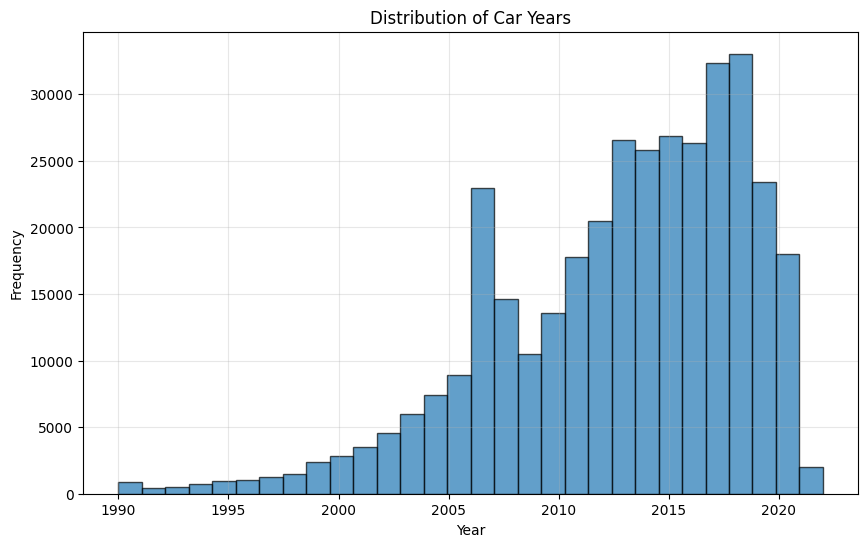

In [47]:
import matplotlib.pyplot as plt

# Basic histogram
plt.figure(figsize=(10, 6))
plt.hist(df['year'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Car Years')
plt.grid(True, alpha=0.3)
plt.show()

In [46]:
def validate_years(df, year_column='year', min_year=1990):
    """
    Validate and filter DataFrame to keep only rows with years >= min_year
    
    Parameters:
    df (pd.DataFrame): Input DataFrame
    year_column (str): Name of the year column
    min_year (int): Minimum year to keep (default: 1990)
    
    Returns:
    pd.DataFrame: Filtered DataFrame with only valid years
    dict: Summary of validation results
    """
    
    # Store original info
    original_count = len(df)
    original_year_range = (df[year_column].min(), df[year_column].max())
    
    # Find invalid years (older than min_year)
    invalid_years_mask = df[year_column] < min_year
    invalid_years = df[invalid_years_mask][year_column].value_counts().sort_index()
    
    # Also check for null values
    null_years = df[year_column].isnull().sum()
    
    # Filter DataFrame to keep only valid years
    filtered_df = df[df[year_column] >= min_year].copy()
    
    # Remove null values as well
    filtered_df = filtered_df[filtered_df[year_column].notna()].copy()
    
    # Calculate new year range
    if len(filtered_df) > 0:
        new_year_range = (filtered_df[year_column].min(), filtered_df[year_column].max())
    else:
        new_year_range = (None, None)
    
    # Create summary
    validation_summary = {
        'original_rows': original_count,
        'filtered_rows': len(filtered_df),
        'dropped_rows': original_count - len(filtered_df),
        'drop_percentage': round((original_count - len(filtered_df)) / original_count * 100, 2),
        'min_year_threshold': min_year,
        'original_year_range': original_year_range,
        'new_year_range': new_year_range,
        'null_years': null_years,
        'invalid_years_count': len(invalid_years),
        'invalid_years_breakdown': dict(invalid_years)
    }
    
    return filtered_df, validation_summary

# Usage
df, summary = validate_years(df, year_column='year', min_year=1990)

# Print summary
print(f"Original rows: {summary['original_rows']}")
print(f"Filtered rows: {summary['filtered_rows']}")
print(f"Dropped rows: {summary['dropped_rows']} ({summary['drop_percentage']}%)")
print(f"Original year range: {summary['original_year_range'][0]} - {summary['original_year_range'][1]}")
print(f"New year range: {summary['new_year_range'][0]} - {summary['new_year_range'][1]}")
print(f"Null years: {summary['null_years']}")

if summary['invalid_years_breakdown']:
    print(f"\nInvalid years found (< {summary['min_year_threshold']}):")
    for year, count in summary['invalid_years_breakdown'].items():
        print(f"  - {year}: {count} cars")

Original rows: 364411
Filtered rows: 357106
Dropped rows: 7305 (2.0%)
Original year range: 1900.0 - 2022.0
New year range: 1990.0 - 2022.0
Null years: 0

Invalid years found (< 1990):
  - 1900.0: 4 cars
  - 1901.0: 1 cars
  - 1905.0: 1 cars
  - 1915.0: 1 cars
  - 1918.0: 1 cars
  - 1922.0: 1 cars
  - 1923.0: 22 cars
  - 1924.0: 6 cars
  - 1925.0: 4 cars
  - 1926.0: 9 cars
  - 1927.0: 19 cars
  - 1928.0: 25 cars
  - 1929.0: 32 cars
  - 1930.0: 41 cars
  - 1931.0: 26 cars
  - 1932.0: 32 cars
  - 1933.0: 16 cars
  - 1934.0: 20 cars
  - 1935.0: 11 cars
  - 1936.0: 11 cars
  - 1937.0: 39 cars
  - 1938.0: 11 cars
  - 1939.0: 24 cars
  - 1940.0: 37 cars
  - 1941.0: 30 cars
  - 1942.0: 8 cars
  - 1943.0: 1 cars
  - 1944.0: 2 cars
  - 1946.0: 31 cars
  - 1947.0: 34 cars
  - 1948.0: 32 cars
  - 1949.0: 37 cars
  - 1950.0: 50 cars
  - 1951.0: 43 cars
  - 1952.0: 40 cars
  - 1953.0: 42 cars
  - 1954.0: 36 cars
  - 1955.0: 96 cars
  - 1956.0: 76 cars
  - 1957.0: 95 cars
  - 1958.0: 25 cars
  - 1959

In [45]:
type(df['year'][0])

numpy.float64

In [62]:
# Check price statistics
print(df['price'].describe())
print(f"Price range: ${df['price'].min():,.0f} - ${df['price'].max():,.0f}")

# Check for extreme outliers
print(f"99th percentile: ${df['price'].quantile(0.99):,.0f}")
print(f"95th percentile: ${df['price'].quantile(0.95):,.0f}")

count    325119.000000
mean      19363.800344
std       13985.429764
min         500.000000
25%        7995.000000
50%       15999.000000
75%       27990.000000
max      100000.000000
Name: price, dtype: float64
Price range: $500 - $100,000
99th percentile: $64,495
95th percentile: $43,995


In [60]:
def clean_price_data(df, price_col='price'):
    """Clean price data by removing invalid and extreme outliers"""
    
    original_count = len(df)
    
    # Remove invalid prices
    df_clean = df[df[price_col] > 0].copy()  # Remove $0 prices
    
    # Set reasonable price limits for used cars
    min_price = 500      # Minimum reasonable car price
    max_price = 100000   # Maximum reasonable used car price
    
    df_clean = df_clean[(df_clean[price_col] >= min_price) & 
                        (df_clean[price_col] <= max_price)]
    
    # Or use percentile-based filtering (more conservative)
    # q99 = df_clean[price_col].quantile(0.99)
    # df_clean = df_clean[df_clean[price_col] <= q99]
    
    dropped_count = original_count - len(df_clean)
    
    print(f"Original rows: {original_count:,}")
    print(f"Cleaned rows: {len(df_clean):,}")
    print(f"Dropped rows: {dropped_count:,} ({dropped_count/original_count*100:.1f}%)")
    
    # New statistics
    print(f"\nCleaned price range: ${df_clean[price_col].min():,.0f} - ${df_clean[price_col].max():,.0f}")
    print(f"New mean: ${df_clean[price_col].mean():,.0f}")
    print(f"New std: ${df_clean[price_col].std():,.0f}")
    
    return df_clean

# Clean your data
df = clean_price_data(df)

Original rows: 325,390
Cleaned rows: 325,119
Dropped rows: 271 (0.1%)

Cleaned price range: $500 - $100,000
New mean: $19,364
New std: $13,985


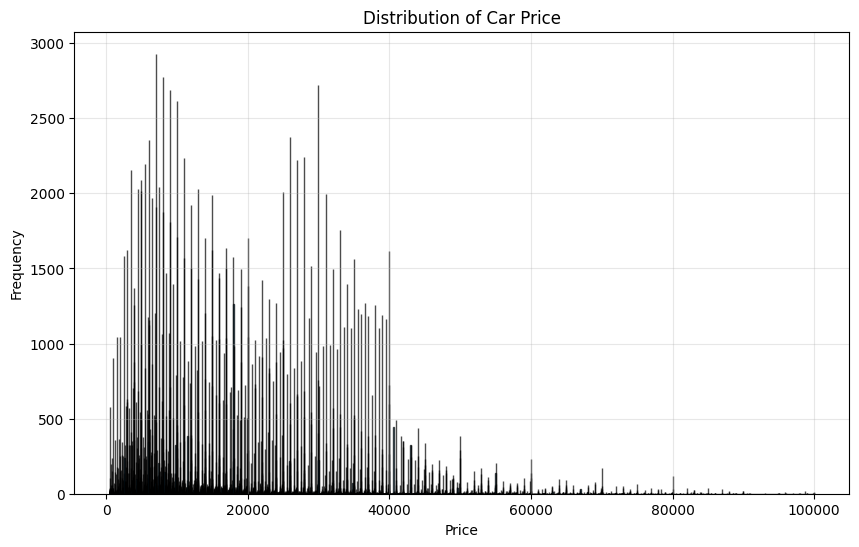

In [61]:
import matplotlib.pyplot as plt

# Basic histogram
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30000, edgecolor='black', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Price')
plt.grid(True, alpha=0.3)
plt.show()

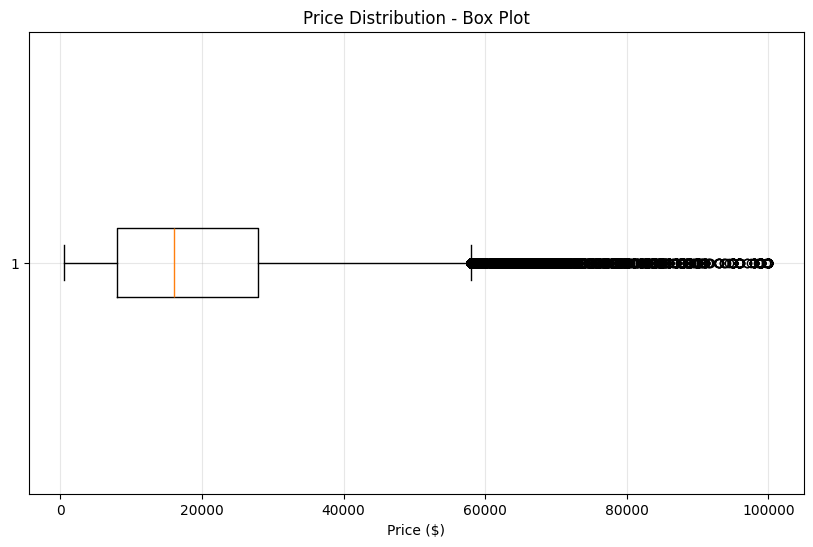

In [64]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['price'], vert=False)
plt.xlabel('Price ($)')
plt.title('Price Distribution - Box Plot')
plt.grid(True, alpha=0.3)
plt.show()

In [77]:
df['transmission'].value_counts()

transmission
automatic    250427
other         59500
manual        15192
Name: count, dtype: int64

In [76]:

df[df['fuel']=='other']

,id,region,region_url,price,year,manufacturer,model,cylinders,fuel,odometer,...,transmission,drive,type,paint_color,description,state,lat,long,posting_date,census_region
13,7315756348,auburn,https://auburn.craigslist.org,30990,2016.0,chevrolet,colorado,NaN,other,34940.0,...,other,4wd,pickup,blue,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-02T10:21:33-0500,East South Central
14,7315715960,auburn,https://auburn.craigslist.org,27990,2014.0,willys,pickup,NaN,other,17805.0,...,other,4wd,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-02T08:44:35-0500,East South Central
16,7315275975,auburn,https://auburn.craigslist.org,33590,2014.0,willys,pickup,NaN,other,55251.0,...,other,4wd,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-01T09:21:37-0500,East South Central
17,7315275942,auburn,https://auburn.craigslist.org,30990,2019.0,polaris,ranger,NaN,other,1834.0,...,other,4wd,pickup,black,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-01T09:21:34-0500,East South Central
21,7314854462,auburn,https://auburn.craigslist.org,30590,2016.0,toyota,tacoma,NaN,other,30176.0,...,other,4wd,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-04-30T11:21:17-0500,East South Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371943,7302487327,wyoming,https://wyoming.craigslist.org,21990,2016.0,bmw,3-series,NaN,other,26599.0,...,automatic,rwd,sedan,blue,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-06T03:30:27-0600,Mountain
371973,7301951550,wyoming,https://wyoming.craigslist.org,30990,2019.0,alfa-romeo,giulia-ti,NaN,other,3883.0,...,other,4wd,sedan,blue,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-05T03:20:24-0600,Mountain
371977,7301949193,wyoming,https://wyoming.craigslist.org,34590,2020.0,alfa-romeo,giulia,NaN,other,2498.0,...,other,rwd,sedan,black,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-05T02:41:27-0600,Mountain
371979,7301949178,wyoming,https://wyoming.craigslist.org,28990,2018.0,packard,sedan,NaN,other,16841.0,...,other,rwd,sedan,white,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-05T02:41:23-0600,Mountain


In [78]:
# transmission column 

from data_transmission import convert_transmission_to_automatic , validate_transmission_values 

df, summary = convert_transmission_to_automatic(df)

# Print summary
print(f"Total rows: {summary['total_rows']}")
print(f"Original unique values: {summary['original_unique_values']}")
print(f"New unique values: {summary['new_unique_values']}")
print(f"Converted to automatic: {summary['converted_to_automatic']}")

print("\nOriginal value counts:")
for value, count in summary['original_value_counts'].items():
    print(f"  - {value}: {count}")

print("\nNew value counts:")
for value, count in summary['new_value_counts'].items():
    print(f"  - {value}: {count}") 


# Usage
df, validation_summary = validate_transmission_values(df)

# Print validation results
print(f"Validation Results:")
print(f"Total rows: {validation_summary['total_rows']}")
print(f"Valid rows: {validation_summary['valid_rows']}")
print(f"Dropped rows: {validation_summary['dropped_rows']} ({validation_summary['drop_percentage']}%)")
print(f"Validation passed: {validation_summary['validation_passed']}")

if validation_summary['invalid_values']:
    print(f"\nInvalid values found:")
    for value, count in validation_summary['invalid_values'].items():
        print(f"  - '{value}': {count} rows")

if validation_summary['null_values'] > 0:
    print(f"\nNull values: {validation_summary['null_values']}")

print(f"\nFinal value counts:")
for value, count in df['transmission'].value_counts().items():
    print(f"  - {value}: {count}")


Total rows: 325119
Original unique values: 3
New unique values: 2
Converted to automatic: 309927

Original value counts:
  - automatic: 250427
  - other: 59500
  - manual: 15192

New value counts:
  - automatic: 309927
  - manual: 15192
Validation Results:
Total rows: 325119
Valid rows: 325119
Dropped rows: 0 (0.0%)
Validation passed: True

Final value counts:
  - automatic: 309927
  - manual: 15192


In [80]:
from data_fuel import validate_fuel_values, convert_fuel_to_gas

# Usage
df, summary = convert_transmission_to_automatic(df)

# Print summary
print(f"Total rows: {summary['total_rows']}")
print(f"Original unique values: {summary['original_unique_values']}")
print(f"New unique values: {summary['new_unique_values']}")
print(f"Converted to automatic: {summary['converted_to_automatic']}")

print("\nOriginal value counts:")
for value, count in summary['original_value_counts'].items():
    print(f"  - {value}: {count}")

print("\nNew value counts:")
for value, count in summary['new_value_counts'].items():
    print(f"  - {value}: {count}")

# Usage
df, validation_summary = validate_transmission_values(df)

# Print validation results
print(f"Validation Results:")
print(f"Total rows: {validation_summary['total_rows']}")
print(f"Valid rows: {validation_summary['valid_rows']}")
print(f"Dropped rows: {validation_summary['dropped_rows']} ({validation_summary['drop_percentage']}%)")
print(f"Validation passed: {validation_summary['validation_passed']}")

if validation_summary['invalid_values']:
    print(f"\nInvalid values found:")
    for value, count in validation_summary['invalid_values'].items():
        print(f"  - '{value}': {count} rows")

if validation_summary['null_values'] > 0:
    print(f"\nNull values: {validation_summary['null_values']}")

print(f"\nFinal value counts:")
for value, count in df['transmission'].value_counts().items():
    print(f"  - {value}: {count}")

Total rows: 325119
Original unique values: 2
New unique values: 2
Converted to automatic: 309927

Original value counts:
  - automatic: 309927
  - manual: 15192

New value counts:
  - automatic: 309927
  - manual: 15192
Validation Results:
Total rows: 325119
Valid rows: 325119
Dropped rows: 0 (0.0%)
Validation passed: True

Final value counts:
  - automatic: 309927
  - manual: 15192


In [81]:
df.columns

Index(['id', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'description', 'state', 'lat', 'long',
       'posting_date', 'census_region'],
      dtype='object')

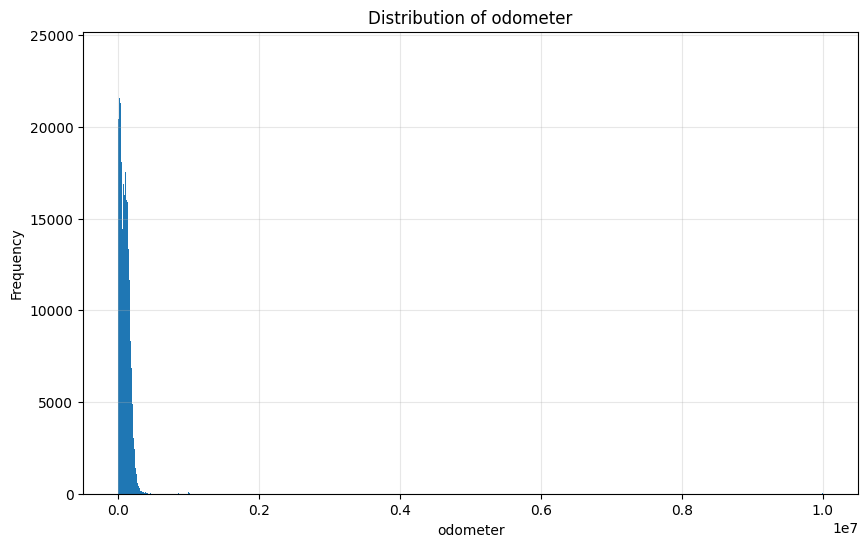

In [88]:


plt.figure(figsize=[10,6])
plt.hist(df['odometer'],bins=1000)
plt.xlabel('odometer')
plt.ylabel('Frequency')
plt.title('Distribution of odometer')
plt.grid(True, alpha=0.3)
plt.show()


In [91]:
# Import the functions
from data_odometer import process_odometer_column, preview_odometer_cleaning

# Preview what will be cleaned
preview_odometer_cleaning(df, 'odometer')

# Clean the data (recommended approach)
df, summary = process_odometer_column(df, 'odometer')

# Check results
print(f"Removed {summary['total_removed']} rows ({summary['total_removal_percentage']:.1f}%)")

Current odometer statistics:
count    3.251190e+05
mean     9.397299e+04
std      1.200726e+05
min      0.000000e+00
25%      3.683950e+04
50%      8.592500e+04
75%      1.349230e+05
max      1.000000e+07
Name: odometer, dtype: float64

Null values: 0
Values > 500,000: 491
Values < 0: 0

Percentile distribution:
  1th percentile: 109
  5th percentile: 7,896
  10th percentile: 15,575
  25th percentile: 36,840
  50th percentile: 85,925
  75th percentile: 134,923
  90th percentile: 177,228
  95th percentile: 203,000
  99th percentile: 266,637

IQR outlier bounds:
  Lower bound: 0
  Upper bound: 282,048
  Potential outliers: 2,334
Step 1: Removing extreme odometer values...

Step 2: Validating odometer values...

Final Results:
Original rows: 325,119
Final rows: 324,628
Total removed: 491 (0.15%)
Final odometer range: 0 - 500,000
Final odometer mean: 91,635
Removed 491 rows (0.1%)


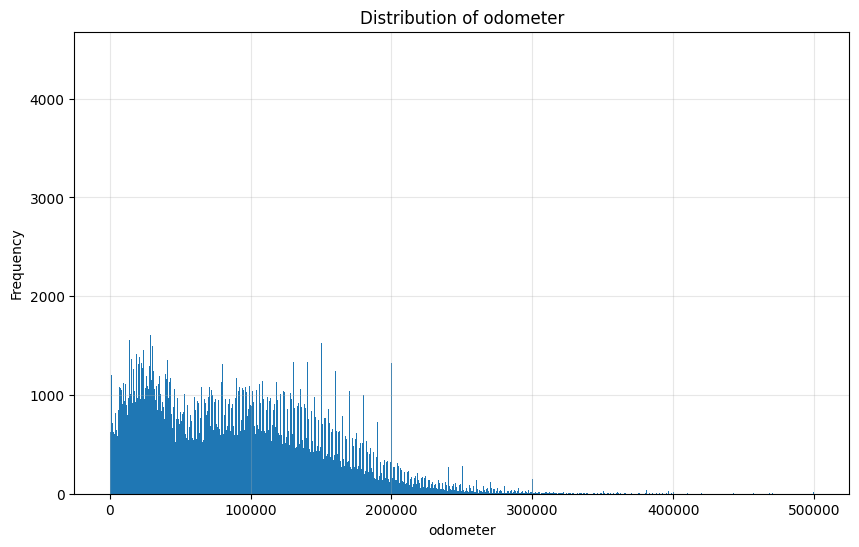

In [92]:


plt.figure(figsize=[10,6])
plt.hist(df['odometer'],bins=1000)
plt.xlabel('odometer')
plt.ylabel('Frequency')
plt.title('Distribution of odometer')
plt.grid(True, alpha=0.3)
plt.show()


In [94]:
df['title_status'].value_counts()

title_status
clean         308715
rebuilt         5875
missing         5867
salvage         2949
lien            1152
parts only        70
Name: count, dtype: int64

In [95]:
df.to_csv('clean_v2.csv')